<a href="https://colab.research.google.com/github/NAGPALADITI14/Employee_Attrition_Report/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Employee Attrition Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Attrition data - Attrition data.csv',encoding='unicode_escape')

pd.isnull(data)
pd.isnull(data).sum()
data.dropna(inplace=True)
data.shape
data.head()
data.info()

pd.isnull(data).sum()
# csv_file = 'cleaned_Employee_attrition.csv'
# data.to_csv(csv_file,index = False)
# from google.colab import files
# files.download(csv_file)

In [ ]:
print(data.dtypes)

le = LabelEncoder()
for column in ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']:
    data[column] = le.fit_transform(data[column])


In [ ]:
scaler = StandardScaler()
numerical_features = ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
                      'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                      'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction',
                      'JobSatisfaction', 'WorkLifeBalance']

data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [ ]:
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.show()

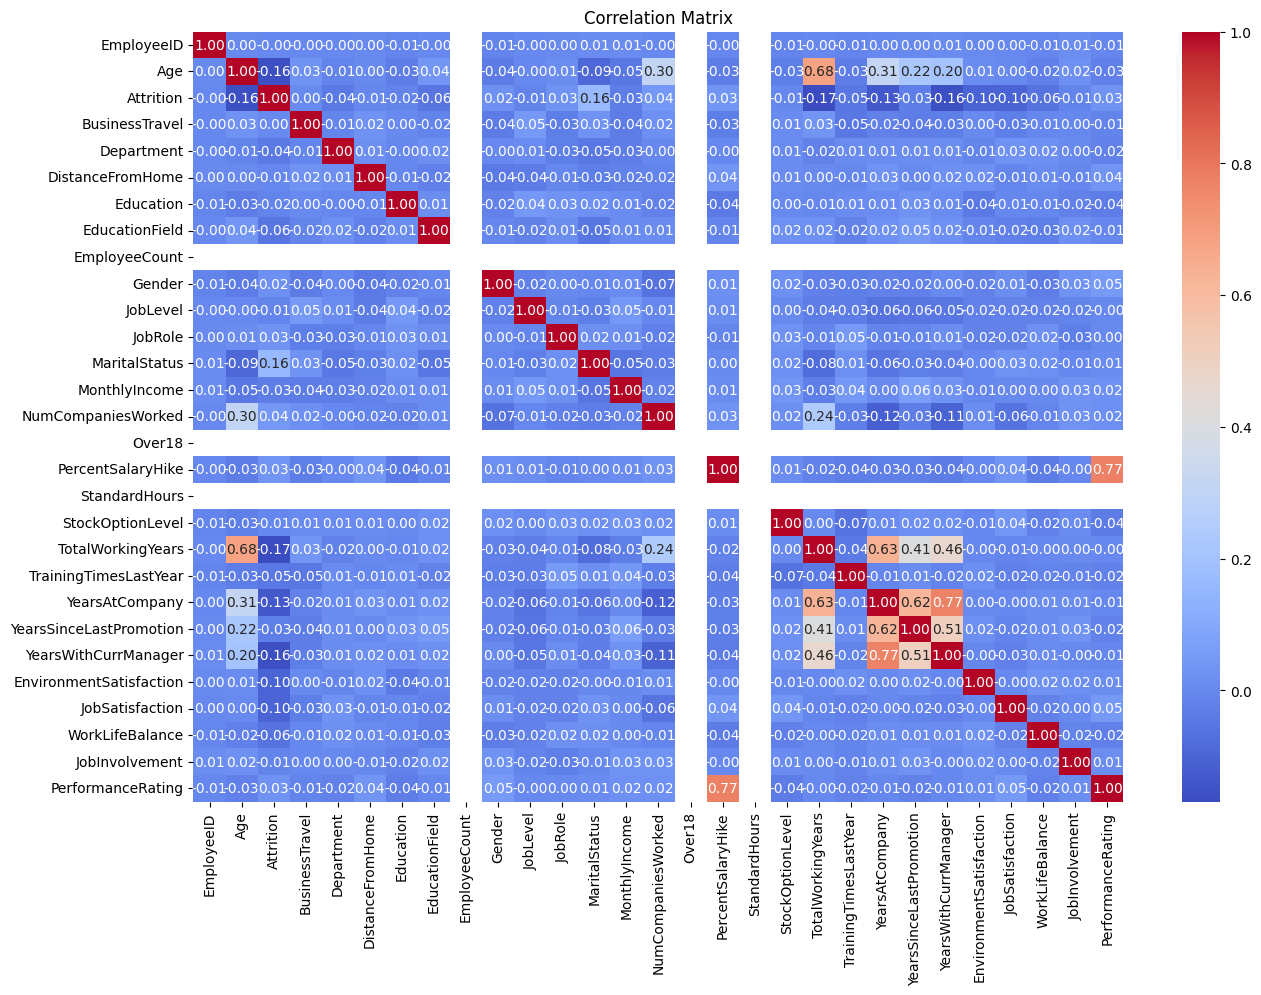

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

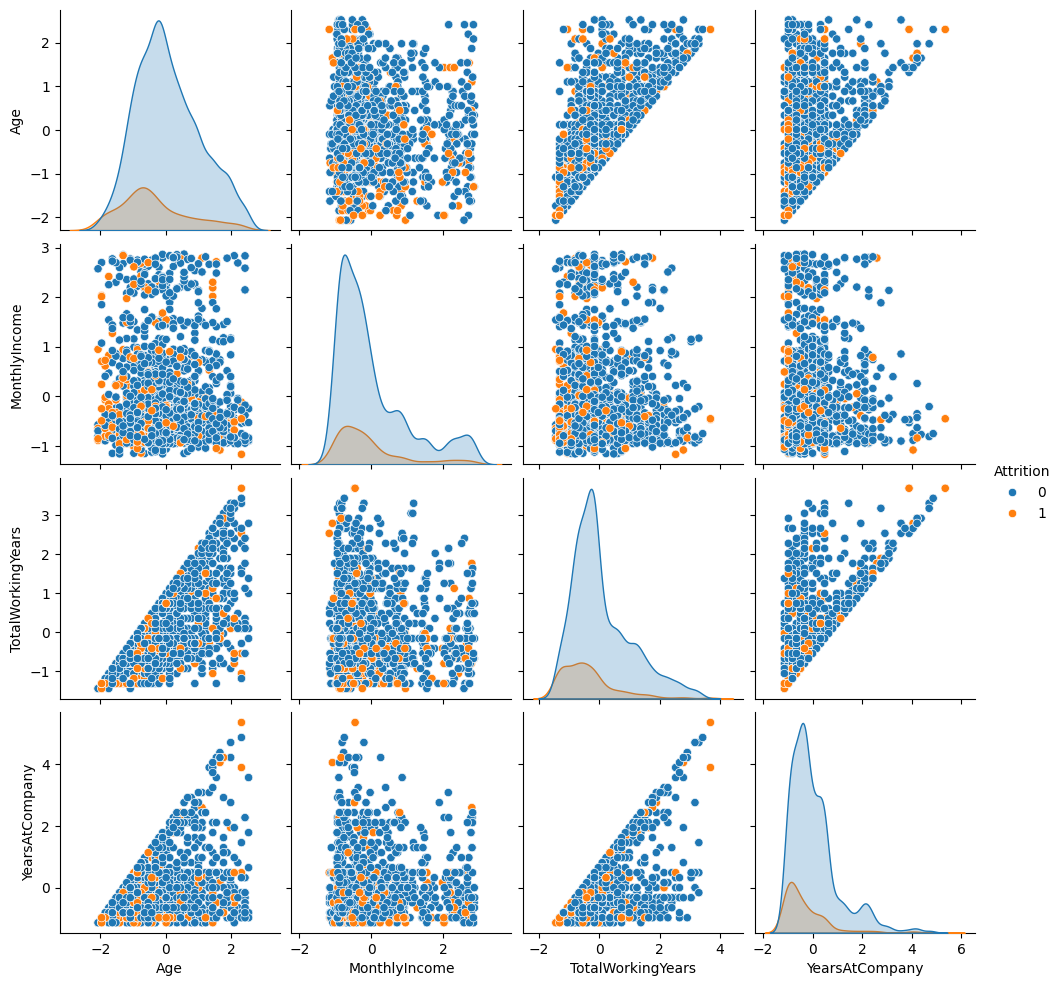

In [ ]:
sns.pairplot(data[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'Attrition']], hue='Attrition')
plt.show()

In [ ]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1076    5]
 [  19  190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1081
           1       0.97      0.91      0.94       209

    accuracy                           0.98      1290
   macro avg       0.98      0.95      0.96      1290
weighted avg       0.98      0.98      0.98      1290

Accuracy Score: 0.9813953488372092


In [ ]:
print(data.head())

In [ ]:
department_mapping = {2: 'Sales', 1: 'Research & Development', 0: 'Human Resources'}
data['Department'] = data['Department'].map(department_mapping)

Department
Human Resources            54
Research & Development    443
Sales                     198
Name: Attrition, dtype: int64


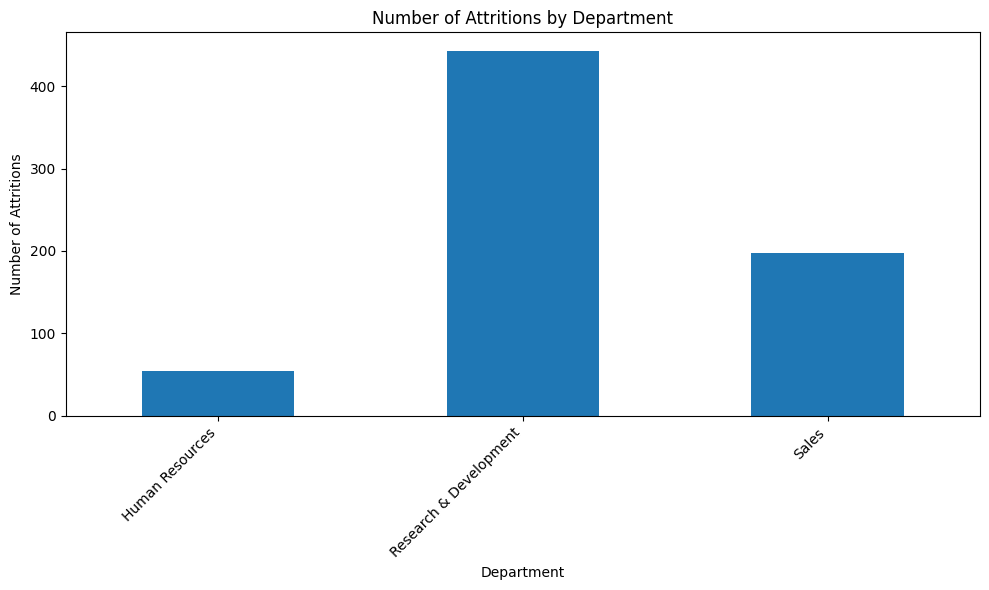

In [ ]:
filtered_data = data[data['Department'].isin(['Sales', 'Research & Development', 'Human Resources'])]

# Calculate the total number of attritions by department
attrition_by_dept = filtered_data.groupby('Department')['Attrition'].sum()

# Display the results
print(attrition_by_dept)

# Plot the data
plt.figure(figsize=(10, 6))
attrition_by_dept.plot(kind='bar')
plt.title('Number of Attritions by Department')
plt.ylabel('Number of Attritions')
plt.xlabel('Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

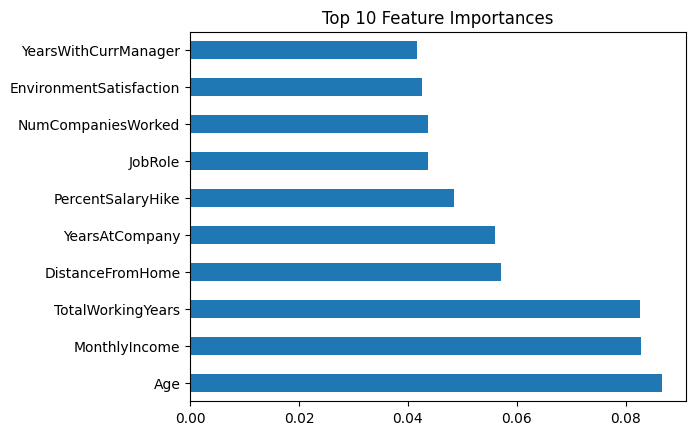

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()
